# Assignment Sheet 4

Made by Finn Kalvelage, Johannes van de Locht, Anna Beckers

## Exercise 1

### a)

In [41]:
%matplotlib widget

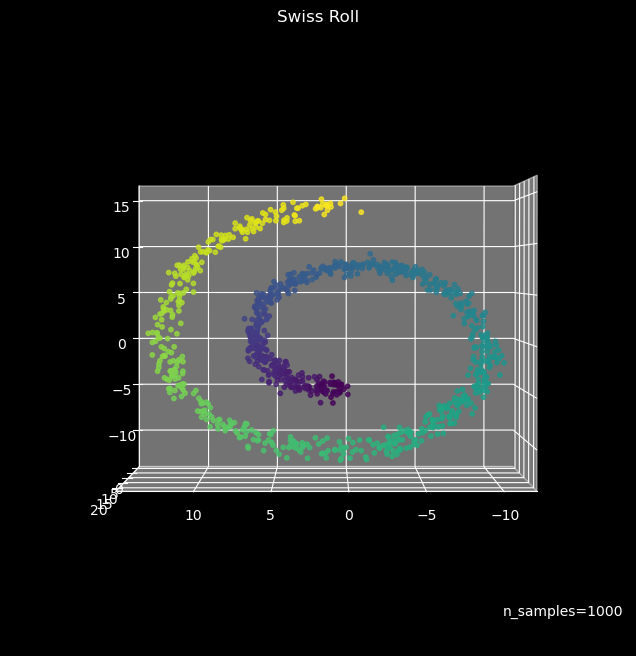

In [1]:
from sklearn.datasets import make_swiss_roll
import matplotlib.pyplot as plt

# swiss role dataset with 1000 samples, standard deviation 0.42, random seed 42
sr_points, sr_colour = make_swiss_roll(n_samples=1000,noise=0.42, random_state=42)

#visualization
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")
fig.add_axes(ax)
ax.scatter(
    sr_points[:, 0], sr_points[:, 1], sr_points[:, 2], c=sr_colour, s=10, alpha=0.8
)
ax.set_title("Swiss Roll")
ax.view_init(azim=90, elev=1)
_ = ax.text2D(0.8, 0.05, s="n_samples=1000", transform=ax.transAxes)


### b)

C:\Users\motte\AppData\Local\Temp\ipykernel_10292\2977300367.py:29: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(cm.ScalarMappable(norm=norm, cmap='viridis'), label="Geodesic Distance")


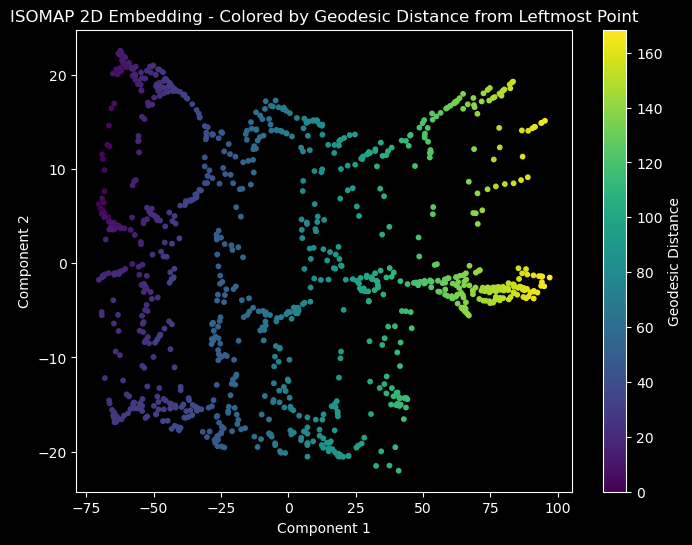

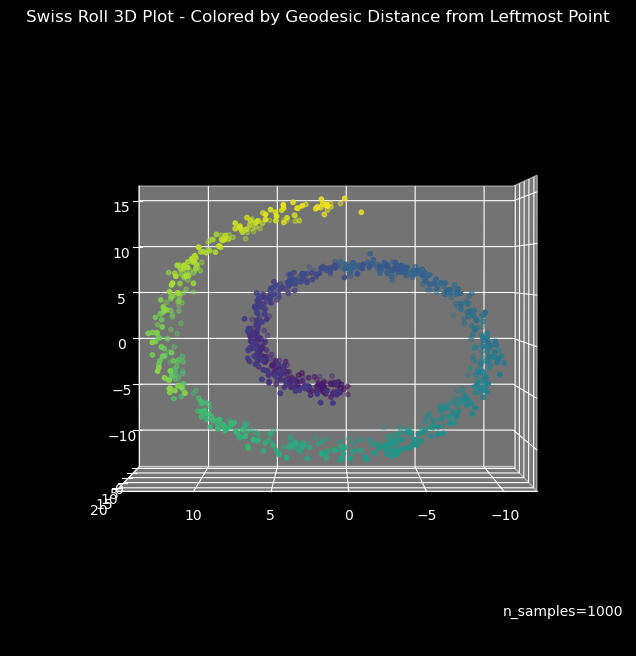

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import Isomap
import matplotlib.cm as cm


# Isomap
isomap = Isomap(n_neighbors=4, n_components=2, p=1)
sr_isomap = isomap.fit_transform(sr_points)

# left-most point
leftmost_index = np.argmin(sr_isomap[:, 0])  # smallest value in first component

# geodesic distance matrix 
geo_dists = isomap.dist_matrix_  # shape (1000, 1000)
# the row for the leftmost point
leftmost_distances = geo_dists[leftmost_index]  # The distance matrix is stored in the isomap object

# colour gradient for relative proximity
norm = plt.Normalize(leftmost_distances.min(), leftmost_distances.max())
colors = cm.viridis(norm(leftmost_distances))

# Plot 2D embedding
plt.figure(figsize=(8, 6))
plt.scatter(sr_isomap[:, 0], sr_isomap[:, 1], c=colors, s=10)
plt.title("ISOMAP 2D Embedding - Colored by Geodesic Distance from Leftmost Point")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.colorbar(cm.ScalarMappable(norm=norm, cmap='viridis'), label="Geodesic Distance")
plt.show()

# Plot original 3D Swiss roll with same coloring
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(sr_points[:, 0], sr_points[:, 1], sr_points[:, 2], c=colors, s=10)
ax.set_title("Swiss Roll 3D Plot - Colored by Geodesic Distance from Leftmost Point")
ax.view_init(azim=90, elev=1)
_ = ax.text2D(0.8, 0.05, s="n_samples=1000", transform=ax.transAxes)
plt.show()


### c)  
This tasks provides sliders which can change the data.

In [3]:
import ipywidgets as widgets
from IPython.display import display


# standard deviation in the swiss roll data generator
sr_standard_deviation = widgets.FloatSlider(
    value=0.42,
    min=0,
    max=2.0,
    step=0.01,
    description='standard deviation of the swiss roll:',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)

 #number of neighbors for building the neighborhood graph in the ISOMAP algorithm
neighbors_isomap = widgets.IntSlider(
    value=5,
    min=3,
    max=99,
    step=1,
    description='number of neighbors for ISOMAP:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
) 

# reference data point from which the distances are calculated
reference_point_colour = widgets.IntSlider(
    value=7,
    min=0,
    max=999,
    step=1,
    description='Reference data point index (for color coded distance map):',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
) 
display(sr_standard_deviation)
display(neighbors_isomap)
display(reference_point_colour)


# swiss role dataset with 1000 samples, standard deviation 0.42, random seed 42
sr_points, sr_colour = make_swiss_roll(n_samples=1000,noise=sr_standard_deviation.value, random_state=42)

# Isomap
isomap = Isomap(n_neighbors=neighbors_isomap.value, n_components=2, p=1)
sr_isomap = isomap.fit_transform(sr_points)

# the row for the geodesic distances to the reference point
dist_row_to_reference_point = isomap.dist_matrix_[reference_point_colour.value]
# colour gradient for relative proximity
norm = plt.Normalize(dist_row_to_reference_point.min(), dist_row_to_reference_point.max())
colors = cm.viridis(norm(dist_row_to_reference_point))


FloatSlider(value=0.42, description='standard deviation of the swiss roll:', max=2.0, readout_format='.1f', st…

IntSlider(value=5, continuous_update=False, description='number of neighbors for ISOMAP:', max=99, min=3)

IntSlider(value=7, continuous_update=False, description='Reference data point index (for color coded distance …

### d) 
THis tasks provides a visualization based on task c)


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_swiss_roll
from sklearn.manifold import Isomap
from matplotlib import cm
import ipywidgets as widgets
from IPython.display import display
import matplotlib


def update_plot(std_dev, neighbors, ref_idx):
       # Generate Swiss roll data
    sr_points, _ = make_swiss_roll(n_samples=1000, noise=std_dev, random_state=42)

    # ISOMAP embedding
    isomap = Isomap(n_neighbors=neighbors, n_components=2)
    sr_isomap = isomap.fit_transform(sr_points)
    geo_dists = isomap.dist_matrix_

    # Sort by first ISOMAP component
    sort_idx = np.argsort(sr_isomap[:, 0])
    sr_isomap_sorted = sr_isomap[sort_idx]
    sr_points_sorted = sr_points[sort_idx]
    geo_dists_sorted = geo_dists[sort_idx][:, sort_idx]

    if ref_idx >= geo_dists_sorted.shape[0]:
        ref_idx = 0

    distances_from_ref = geo_dists_sorted[ref_idx]
    norm = plt.Normalize(distances_from_ref.min(), distances_from_ref.max())
    colors = cm.viridis(norm(distances_from_ref))

    # Side-by-side plot
    fig = plt.figure(figsize=(16, 6))

    # Left: 3D Swiss roll
    ax1 = fig.add_subplot(1, 2, 1, projection='3d')
    ax1.scatter(sr_points_sorted[:, 0], sr_points_sorted[:, 1], sr_points_sorted[:, 2], c=colors, s=10)
    ax1.set_title("3D Swiss Roll")
    ax1.view_init(azim=90, elev=1)

    # Right: 2D ISOMAP
    ax2 = fig.add_subplot(1, 2, 2)
    scatter = ax2.scatter(sr_isomap_sorted[:, 0], sr_isomap_sorted[:, 1], c=colors, s=10)
    ax2.set_title("ISOMAP 2D Embedding")
    ax2.set_xlabel("Component 1")
    ax2.set_ylabel("Component 2")
    cbar = fig.colorbar(cm.ScalarMappable(norm=norm, cmap='viridis'), ax=ax2)
    cbar.set_label("Geodesic Distance")

    plt.tight_layout()
    plt.show()
    plt.close(fig) 


# Widgets
sr_standard_deviation = widgets.FloatSlider(
    value=0.42, min=0, max=1.0, step=0.01,
    description='Standard deviation:', continuous_update=False
)

neighbors_isomap = widgets.IntSlider(
    value=8, min=3, max=99, step=1,
    description='ISOMAP neighbors:', continuous_update=False
)

reference_point_colour = widgets.IntSlider(
    value=7, min=0, max=999, step=1,
    description='Reference index:', continuous_update=False
)

ui = widgets.VBox([
    sr_standard_deviation,
    neighbors_isomap,
    reference_point_colour
])

out = widgets.interactive_output(
    update_plot,
    {
        "std_dev": sr_standard_deviation,
        "neighbors": neighbors_isomap,
        "ref_idx": reference_point_colour
    }
)

display(ui, out)

Output()

### e) 
Using k = 8 neighbors, ISOMAP first fails to reconstruct the plane of the manifold at a standard deviation of 0.45.

<img src="std44notbroken.png" width="500"/> <img src="std45broken.png" width="515"/>


Fixing this can be done by using the ISOMAP parameter neighbors = 7:

<img src="fixed7.png" width="500"/>

### f)
caching of intermediate results added:

In [ ]:
from functools import lru_cache
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_swiss_roll
from sklearn.manifold import Isomap
from matplotlib import cm
import ipywidgets as widgets
from IPython.display import display
import matplotlib


# Custom cache dictionary
cache = {
    "swiss_roll": {},      # key: std_dev
    "isomap": {},          # key: (std_dev, neighbors)
}

# Widgets
sr_standard_deviation = widgets.FloatSlider(
    value=0.42, min=0, max=1.0, step=0.01,
    description='Standard deviation:', continuous_update=False
)

neighbors_isomap = widgets.IntSlider(
    value=8, min=2, max=99, step=1,
    description='ISOMAP neighbors:', continuous_update=False
)

reference_point_colour = widgets.IntSlider(
    value=7, min=0, max=999, step=1,
    description='Reference index:', continuous_update=False
)

def update_plot(std_dev, neighbors, ref_idx):
    # --- Cache: Swiss roll ---
    if std_dev not in cache["swiss_roll"]:
        points, _ = make_swiss_roll(n_samples=1000, noise=std_dev, random_state=42)
        cache["swiss_roll"][std_dev] = points
    else:
        points = cache["swiss_roll"][std_dev]

    # --- Cache: ISOMAP result ---
    iso_key = (std_dev, neighbors)
    if iso_key not in cache["isomap"]:
        isomap = Isomap(n_neighbors=neighbors, n_components=2)
        embedding = isomap.fit_transform(points)
        dist_matrix = isomap.dist_matrix_
        cache["isomap"][iso_key] = {
            "embedding": embedding,
            "dist_matrix": dist_matrix
        }
    else:
        result = cache["isomap"][iso_key]
        embedding = result["embedding"]
        dist_matrix = result["dist_matrix"]

    # --- Sorting ---
    sort_idx = np.argsort(embedding[:, 0])
    points_sorted = points[sort_idx]
    embedding_sorted = embedding[sort_idx]
    dist_sorted = dist_matrix[sort_idx][:, sort_idx]

    # --- Coloring ---
    ref_idx = min(ref_idx, dist_sorted.shape[0] - 1)
    dists_from_ref = dist_sorted[ref_idx]
    norm = plt.Normalize(dists_from_ref.min(), dists_from_ref.max())
    colors = cm.viridis(norm(dists_from_ref))

    # --- Plotting ---
    fig = plt.figure(figsize=(16, 6))

    # Left: 3D
    ax1 = fig.add_subplot(1, 2, 1, projection='3d')
    ax1.scatter(points_sorted[:, 0], points_sorted[:, 1], points_sorted[:, 2], c=colors, s=10)
    ax1.set_title("3D Swiss Roll")
    ax1.view_init(azim=90, elev=1)

    # Right: 2D ISOMAP
    ax2 = fig.add_subplot(1, 2, 2)
    scatter = ax2.scatter(embedding_sorted[:, 0], embedding_sorted[:, 1], c=colors, s=10)
    ax2.set_title("ISOMAP 2D Embedding")
    ax2.set_xlabel("Component 1")
    ax2.set_ylabel("Component 2")
    fig.colorbar(cm.ScalarMappable(norm=norm, cmap='viridis'), ax=ax2, label="Geodesic Distance")

    plt.tight_layout()
    plt.show()


ui = widgets.VBox([
    sr_standard_deviation,
    neighbors_isomap,
    reference_point_colour
])

out = widgets.interactive_output(
    update_plot,
    {
        "std_dev": sr_standard_deviation,
        "neighbors": neighbors_isomap,
        "ref_idx": reference_point_colour
    }
)

display(ui, out)

Output()